# Assignment 1

# Basic image processing tasks

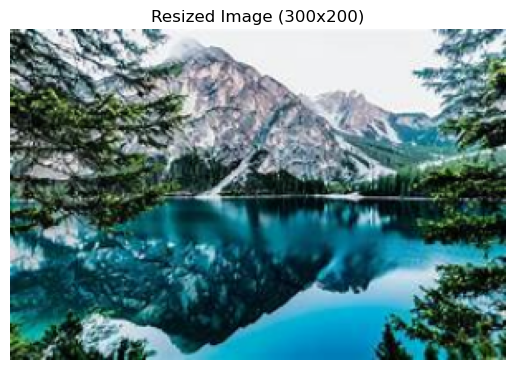

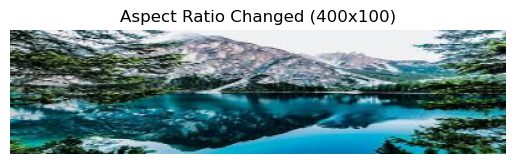

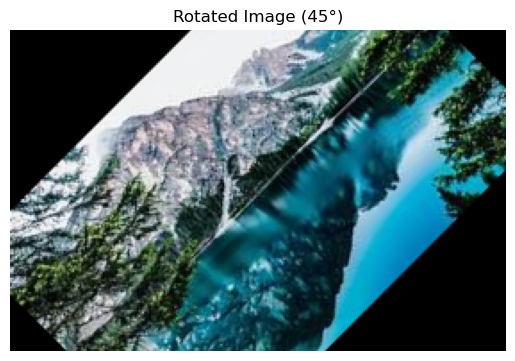

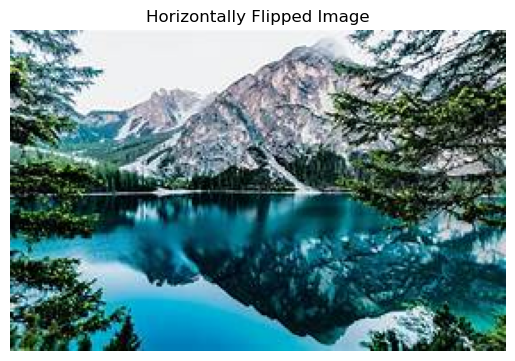

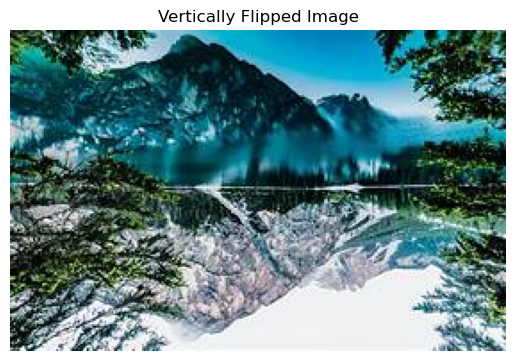

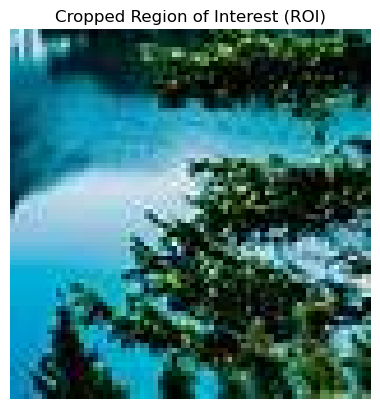

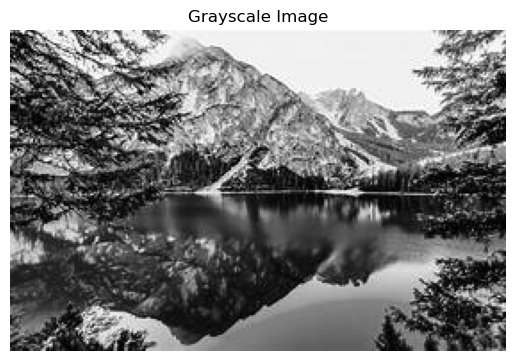

In [7]:
import cv2
import matplotlib.pyplot as plt

# Helper function to display images
def show_image(img, title):
    # Convert BGR to RGB for correct color display
    if len(img.shape) == 3:  # Color image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image = cv2.imread(r'D:\OneDrive\Desktop\th.jpeg')  # Use raw string for path

if image is None:
    print("Error: Could not load image. Check the file path.")
else:
    # 1. Resize the image
    resized_image = cv2.resize(image, (300, 200))
    show_image(resized_image, "Resized Image (300x200)")

    # 2. Change the shape of the image (aspect ratio)
    aspect_changed = cv2.resize(image, (400, 100))  # Intentional distortion
    show_image(aspect_changed, "Aspect Ratio Changed (400x100)")

    # 3. Rotate the image by specified angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    angle = 45  # You can change this angle
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    show_image(rotated_image, f"Rotated Image ({angle}°)")

    # 4. Flip the image
    flipped_horizontal = cv2.flip(image, 1)
    show_image(flipped_horizontal, "Horizontally Flipped Image")

    flipped_vertical = cv2.flip(image, 0)
    show_image(flipped_vertical, "Vertically Flipped Image")

    # 5. Crop a Region of Interest (ROI)
    roi = image[100:300, 200:400]  # Make sure the indices are within image size
    show_image(roi, "Cropped Region of Interest (ROI)")

    # 6. Convert to Grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')
    plt.show()


 # Assignment 2

# Change the color of an image and perform color space 

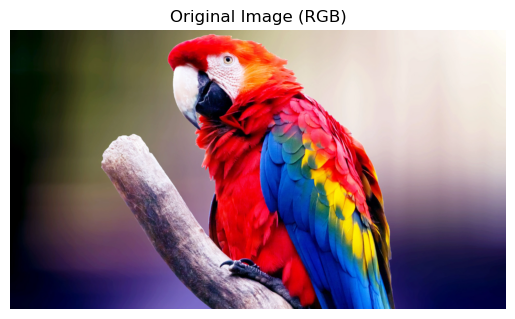

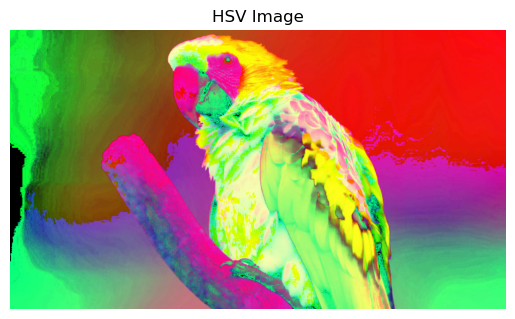

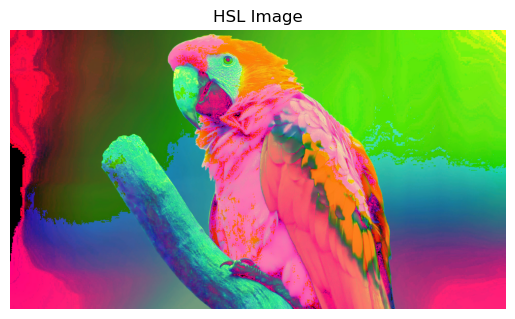

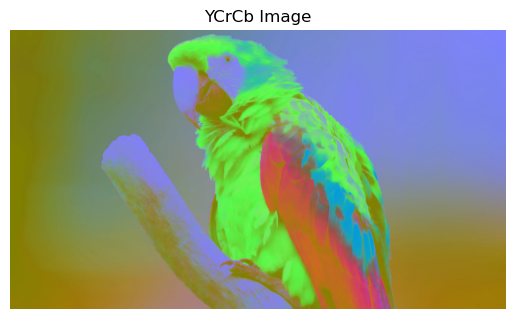

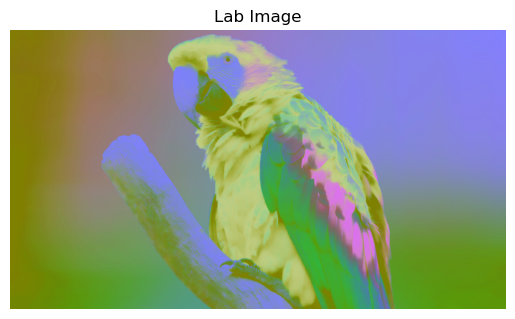

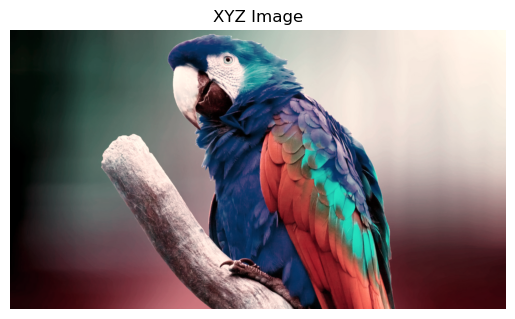

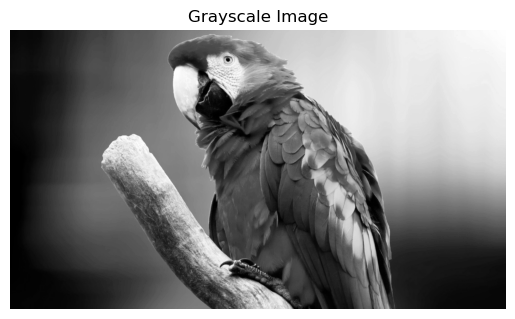

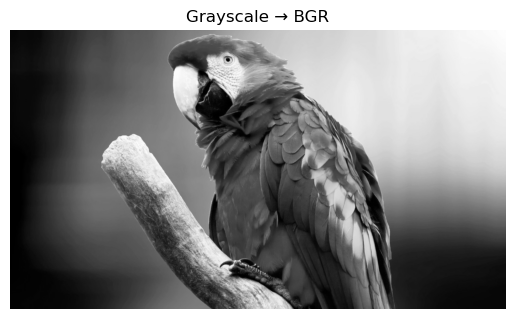

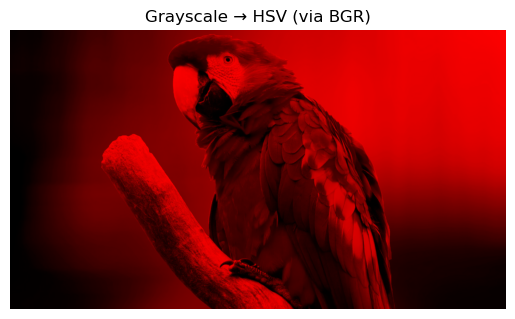

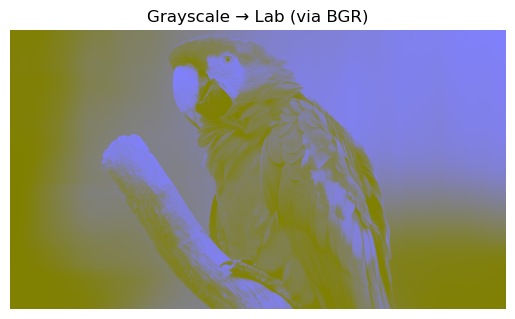

In [12]:
import cv2
import matplotlib.pyplot as plt

# Helper function to display images
def show_image(img, title, is_gray=False):
    if not is_gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image = cv2.imread(r'D:\OneDrive\Desktop\wp6602856.webp')  # Change path accordingly

if image is None:
    print("Error: Could not load image.")
else:
    # Show original
    show_image(image, "Original Image (RGB)")

    # 1. RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    show_image(hsv_image, "HSV Image")

    # 2. RGB to HSL (in OpenCV, this is called HLS)
    hsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    show_image(hsl_image, "HSL Image")

    # 3. RGB to YCrCb
    ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    show_image(ycrcb_image, "YCrCb Image")

    # 4. RGB to Lab
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    show_image(lab_image, "Lab Image")

    # 5. RGB to XYZ
    xyz_image = cv2.cvtColor(image, cv2.COLOR_BGR2XYZ)
    show_image(xyz_image, "XYZ Image")

    # 6. Convert to Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    show_image(gray_image, "Grayscale Image", is_gray=True)

    # 7. Convert grayscale back to other color spaces (2-step conversion)

# First: Grayscale → BGR
gray_to_bgr = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Then: BGR → HSV, Lab, etc.
gray_to_hsv = cv2.cvtColor(gray_to_bgr, cv2.COLOR_BGR2HSV)
gray_to_lab = cv2.cvtColor(gray_to_bgr, cv2.COLOR_BGR2Lab)

# Display results
show_image(gray_to_bgr, "Grayscale → BGR")
show_image(gray_to_hsv, "Grayscale → HSV (via BGR)")
show_image(gray_to_lab, "Grayscale → Lab (via BGR)")

 # Assignment 3

# Use methods of image enhancement [Image Contrast] in the spatial domain:
Histogram equalization.
Contrast stretching.
Adaptive histogram equalization.


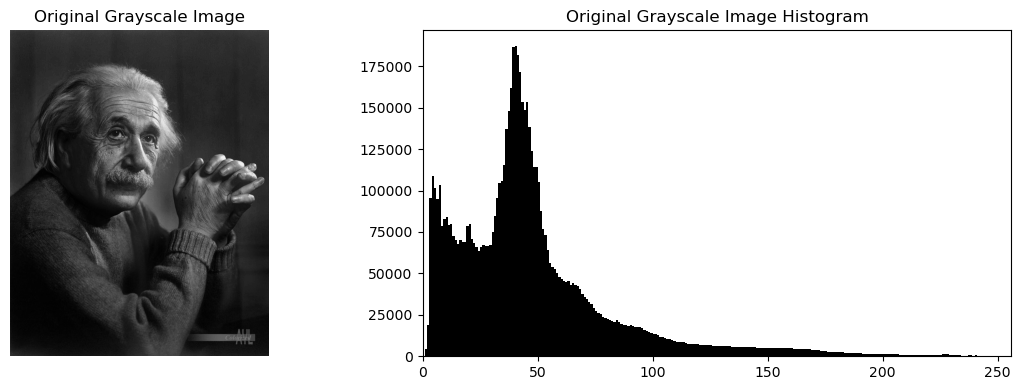

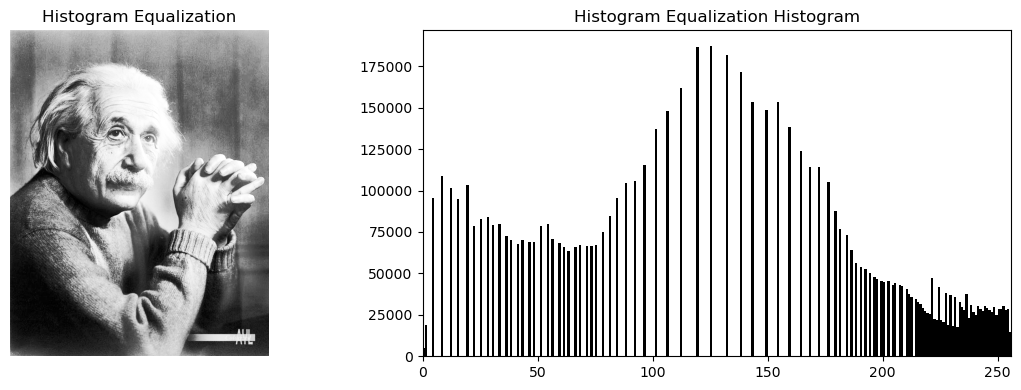

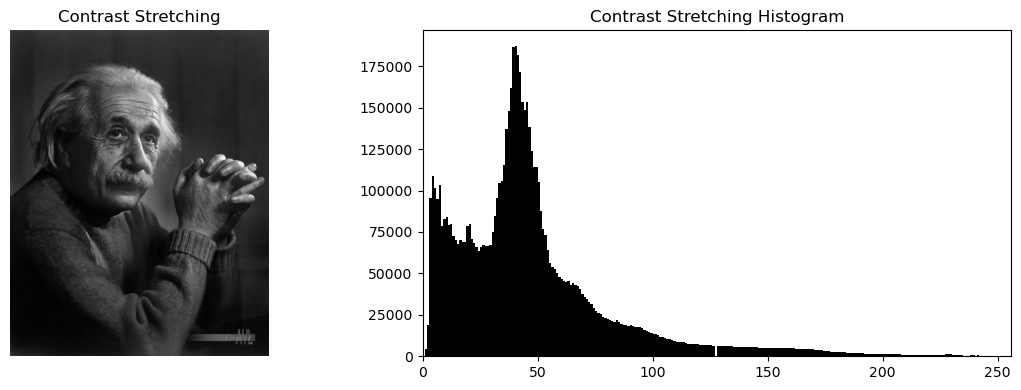

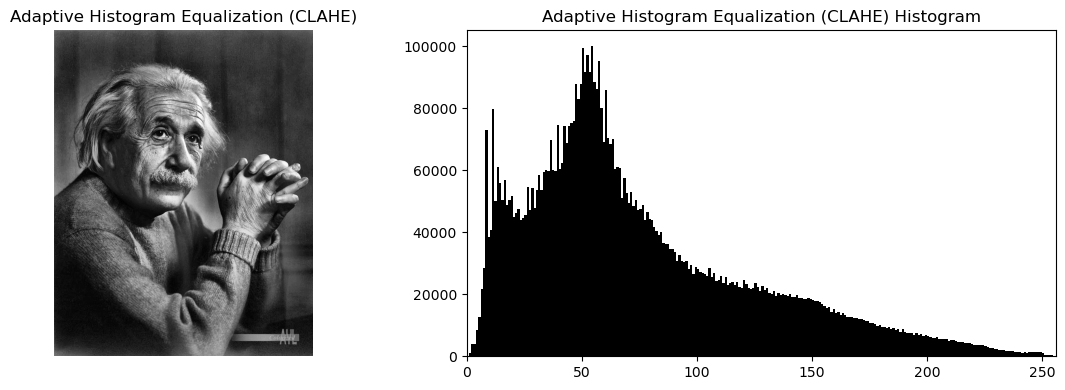

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to show image and histogram
def show_image_and_histogram(img, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].imshow(img, cmap='gray')
    axs[0].set_title(title)
    axs[0].axis('off')

    axs[1].hist(img.ravel(), bins=256, range=(0, 256), color='black')
    axs[1].set_title(f'{title} Histogram')
    axs[1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Load image and convert to grayscale
image = cv2.imread(r"D:\OneDrive\Desktop\tlgaz8nqw1s01.jpg")  # Update this path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Original grayscale
show_image_and_histogram(gray, "Original Grayscale Image")

# 2. Histogram Equalization
hist_eq = cv2.equalizeHist(gray)
show_image_and_histogram(hist_eq, "Histogram Equalization")

# 3. Contrast Stretching
min_val = np.min(gray)
max_val = np.max(gray)
contrast_stretched = ((gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)
show_image_and_histogram(contrast_stretched, "Contrast Stretching")

# 4. Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_eq = clahe.apply(gray)
show_image_and_histogram(adaptive_eq, "Adaptive Histogram Equalization (CLAHE)")



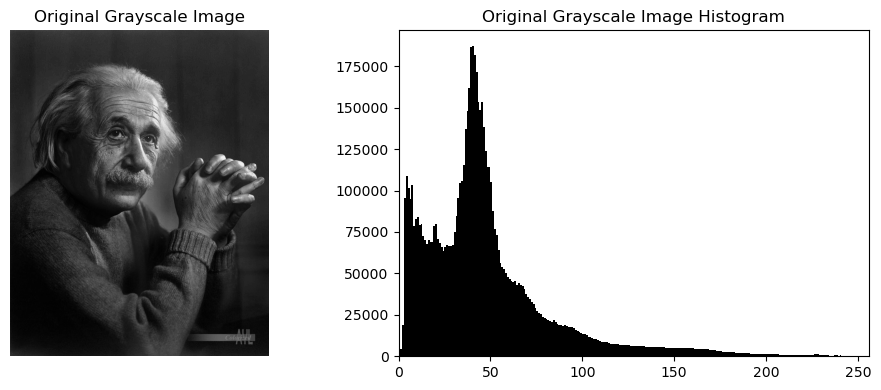

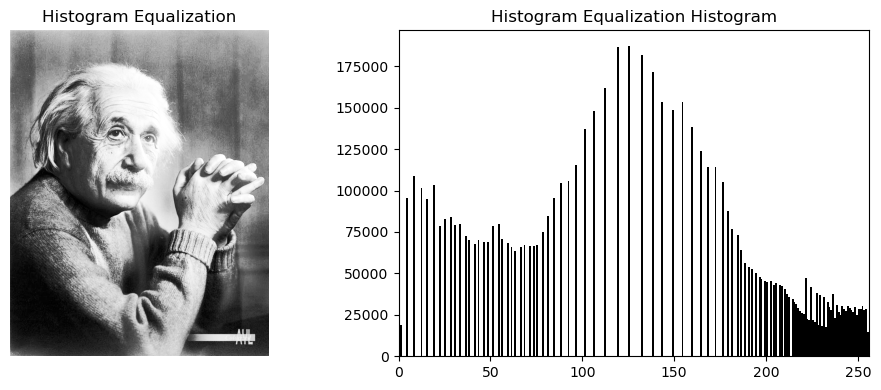

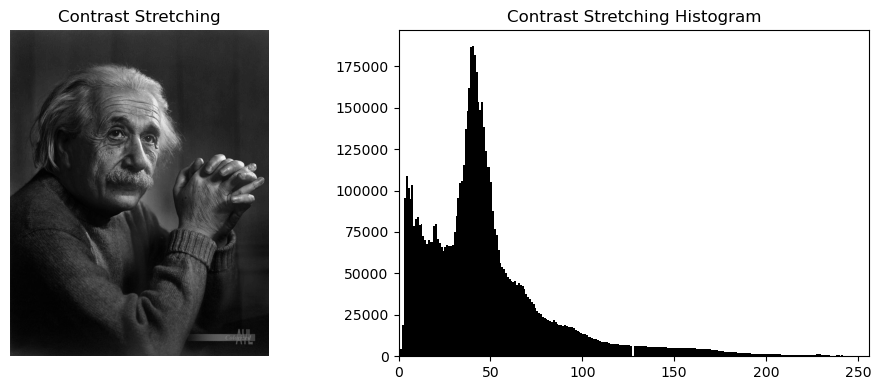

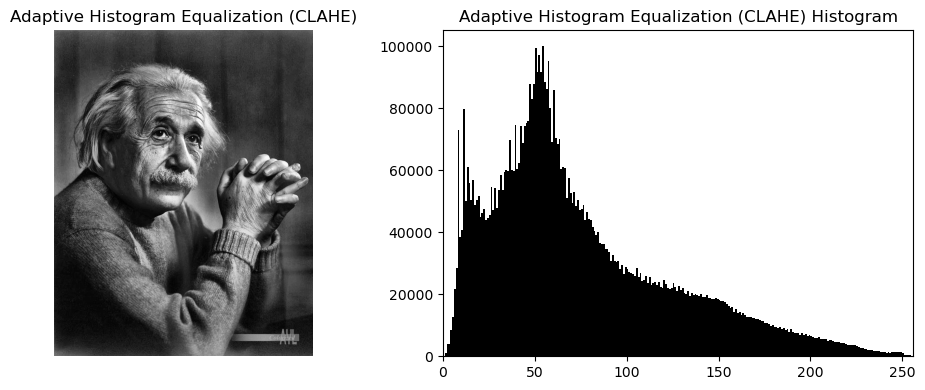

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = cv2.imread(r"D:\OneDrive\Desktop\tlgaz8nqw1s01.jpg")  # Update the path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Helper function to display image and histogram side by side
def show_image_and_histogram(image, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(title)
    axes[0].axis('off')

    axes[1].hist(image.ravel(), bins=256, range=(0, 256), color='black')
    axes[1].set_title(f'{title} Histogram')
    axes[1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# 1. Original image
show_image_and_histogram(gray, "Original Grayscale Image")

# 2. Histogram Equalization
hist_eq = cv2.equalizeHist(gray)
show_image_and_histogram(hist_eq, "Histogram Equalization")

# 3. Contrast Stretching
min_val = np.min(gray)
max_val = np.max(gray)
contrast_stretched = ((gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)
show_image_and_histogram(contrast_stretched, "Contrast Stretching")

# 4. Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_eq = clahe.apply(gray)
show_image_and_histogram(adaptive_eq, "Adaptive Histogram Equalization (CLAHE)")


# Assignment 4

# Use basic gray-level transformation methods:
Image negative transformation
Logarithmic transformation
Gamma transformation
Contrast stretching

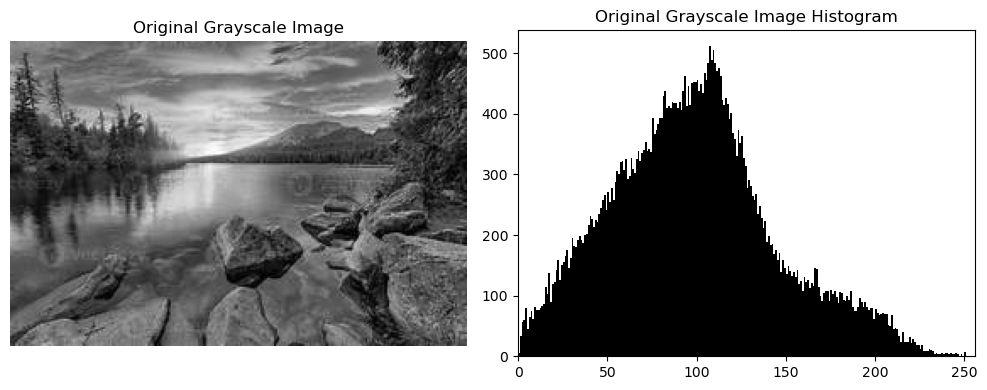

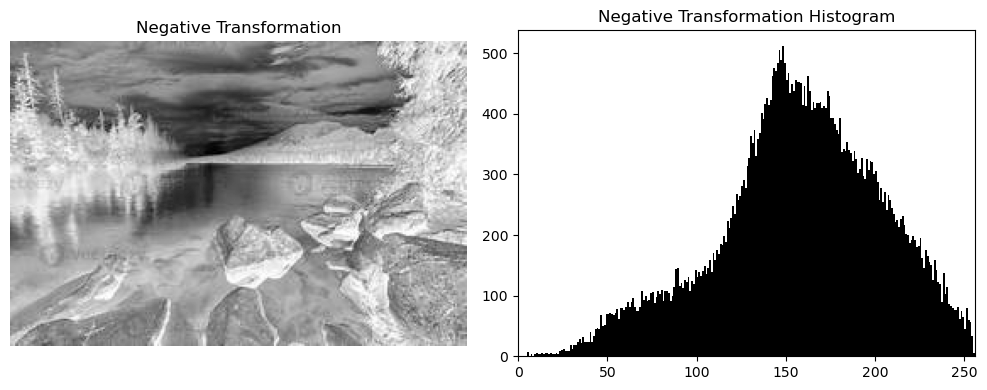

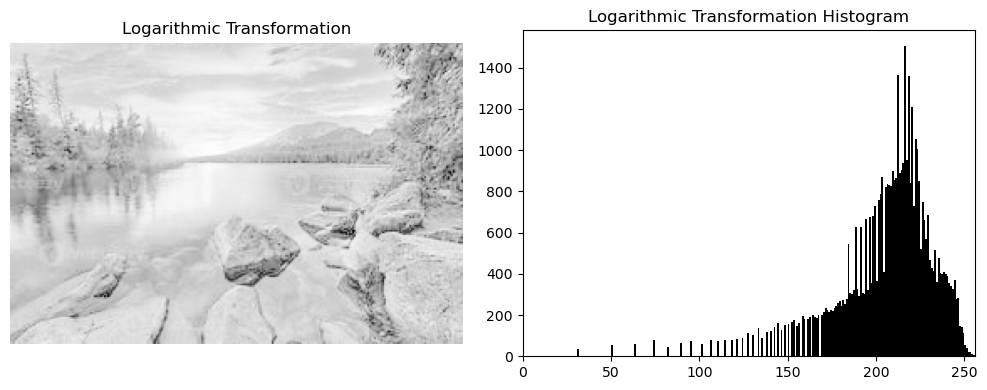

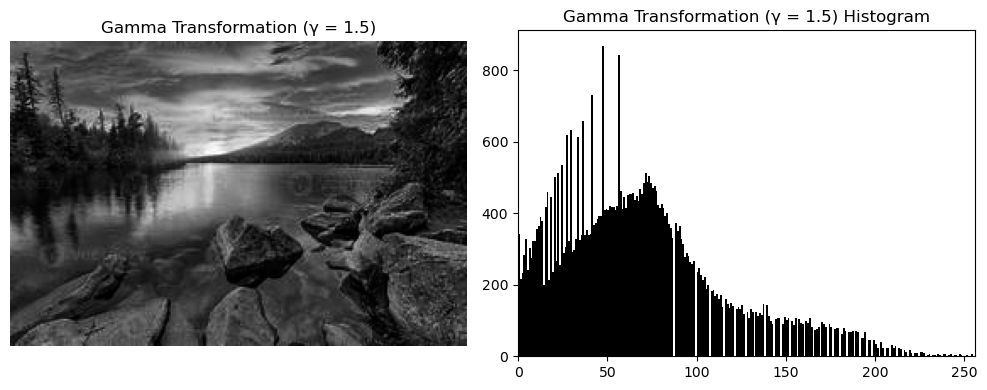

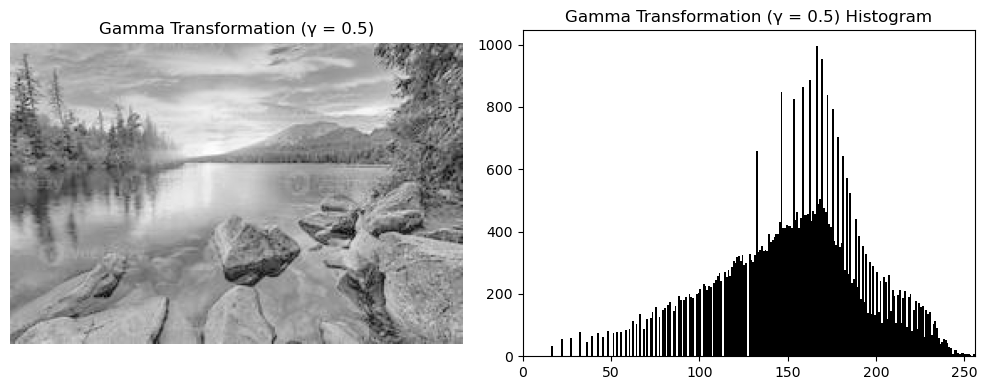

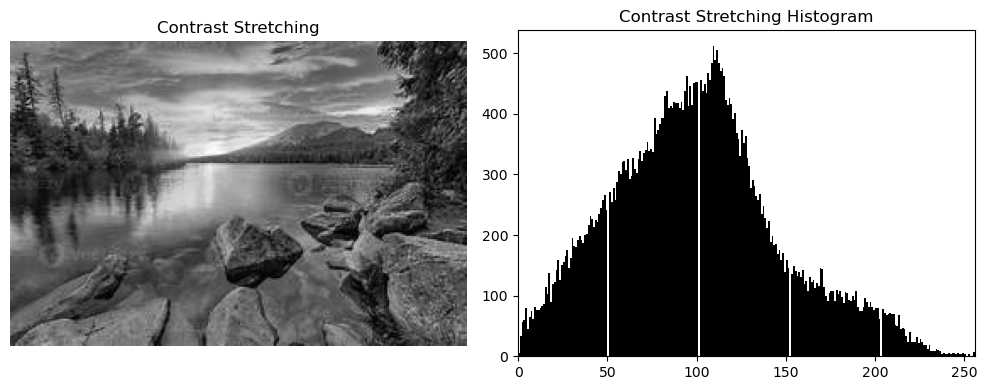

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image to grayscale
image = cv2.imread(r"D:\OneDrive\Desktop\th (1).jpeg")  # Update path as needed
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Helper function to show image and histogram
def show_image_and_histogram(image, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(title)
    axes[0].axis('off')

    axes[1].hist(image.ravel(), bins=256, range=(0, 256), color='black')
    axes[1].set_title(f'{title} Histogram')
    axes[1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# 1. Original
show_image_and_histogram(gray, "Original Grayscale Image")

# 2. Image Negative: s = L - 1 - r
negative = 255 - gray
show_image_and_histogram(negative, "Negative Transformation")

# 3. Logarithmic Transformation: s = c * log(1 + r)
gray_float = np.float32(gray)
log_transformed = cv2.normalize(np.log1p(gray_float), None, 0, 255, cv2.NORM_MINMAX)
log_transformed = np.uint8(log_transformed)
show_image_and_histogram(log_transformed, "Logarithmic Transformation")

# 4. Gamma Transformation: s = c * r^γ
def gamma_transform(img, gamma):
    img_normalized = img / 255.0
    gamma_corrected = np.power(img_normalized, gamma)
    gamma_corrected = np.uint8(cv2.normalize(gamma_corrected, None, 0, 255, cv2.NORM_MINMAX))
    return gamma_corrected

gamma_1_5 = gamma_transform(gray, 1.5)
gamma_0_5 = gamma_transform(gray, 0.5)

show_image_and_histogram(gamma_1_5, "Gamma Transformation (γ = 1.5)")
show_image_and_histogram(gamma_0_5, "Gamma Transformation (γ = 0.5)")

# 5. Contrast Stretching (Min-Max Normalization)
min_val = np.min(gray)
max_val = np.max(gray)
contrast_stretched = ((gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)
show_image_and_histogram(contrast_stretched, "Contrast Stretching")


# Assignment 5
K Means

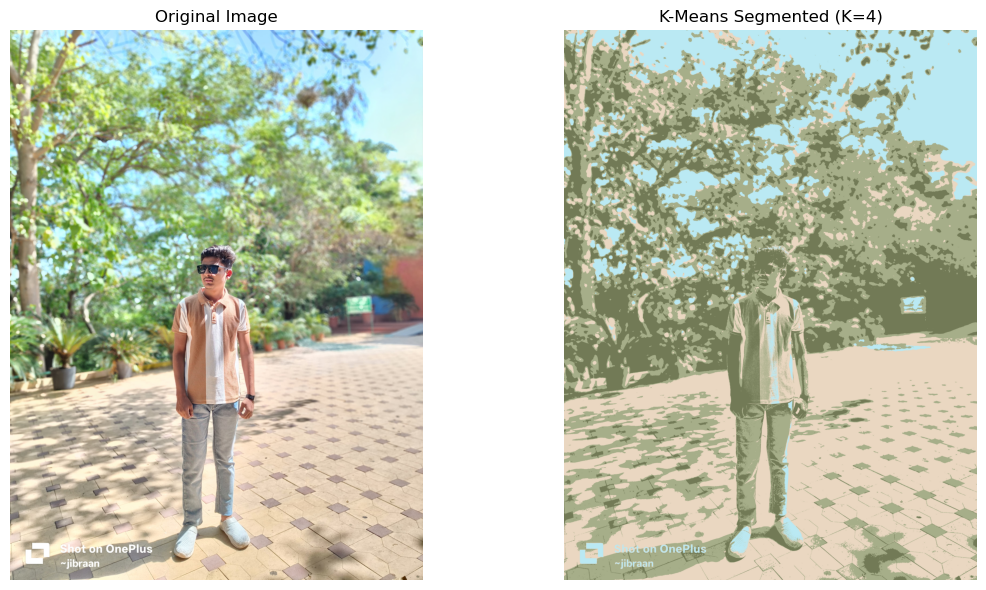

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image to RGB
image = cv2.imread(r"D:\OneDrive\Desktop\WhatsApp Image 2025-04-18 at 17.21.40_4b78ae25.jpg")  # Update your path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_vals = image_rgb.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)  # Convert to float

# Define criteria and apply KMeans
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 4  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and map the labels to the cluster center colors
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(image_rgb.shape)

# Display original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(segmented_image)
axes[1].set_title(f"K-Means Segmented (K={K})")
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Assignment 6 
Edge detection

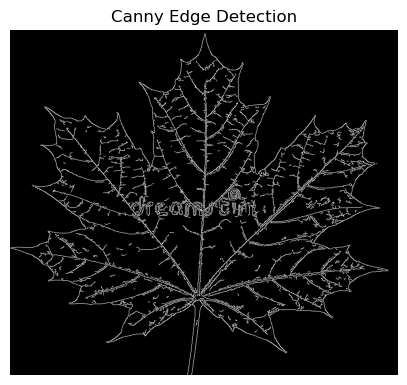

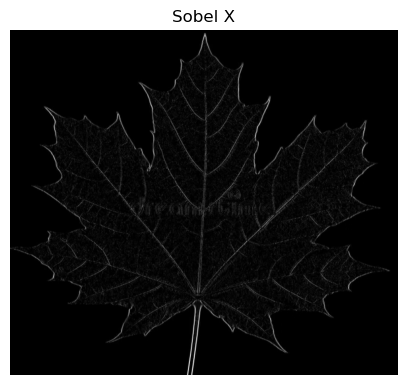

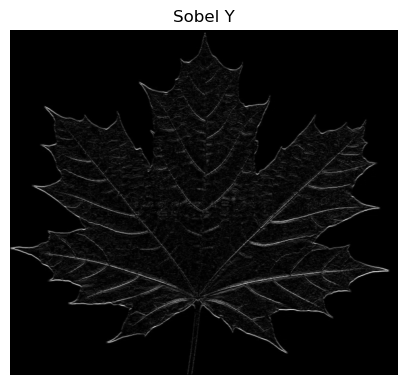

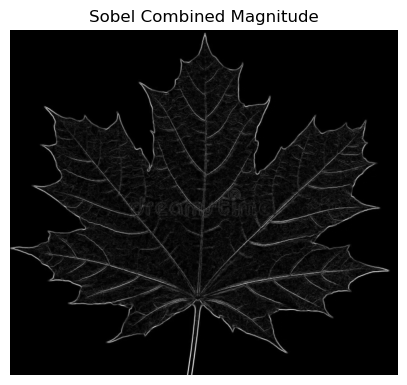

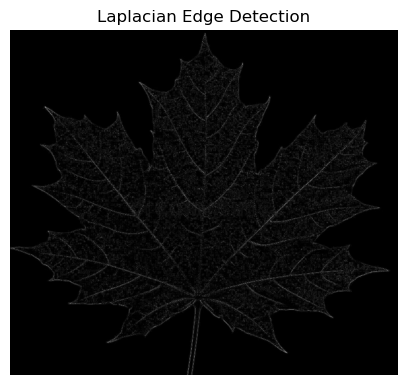

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread(r"D:\OneDrive\Desktop\reddish-maple-leaf-189738.webp")  # Update path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Helper function to display edge images
def show_edge(title, edge_image):
    plt.figure(figsize=(5, 5))
    plt.imshow(edge_image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Canny Edge Detection
canny_edges = cv2.Canny(gray, 100, 200)
show_edge("Canny Edge Detection", canny_edges)

# 2. Sobel Edge Detection
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # X-direction
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Y-direction
sobel_combined = cv2.magnitude(sobelx, sobely)

show_edge("Sobel X", np.abs(sobelx))
show_edge("Sobel Y", np.abs(sobely))
show_edge("Sobel Combined Magnitude", sobel_combined)

# 3. Laplacian Edge Detection
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
show_edge("Laplacian Edge Detection", np.abs(laplacian))
